# **Logistic Regression**




## 1. Load and Prepare Datasets

Importing Packages

In [29]:
# Import packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [37]:
# Saving Data into DataFrame
file_url = 'https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/repurchase_training.csv'
df = pd.read_csv(file_url)

Exploring Datasets

In [ ]:
# Checking the first 5 lines of the Dataframe
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [ ]:
# Getting the shape of the Dataframe
df.shape

(131337, 17)

In [ ]:
# CHecking for missin values using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

It seeems that we have two columns with missing values which are **age_band** and **gender**

In [ ]:
# Show Descriptive Statistics of Dataframe
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Exploring Variables

In [ ]:
#Checking the distribution of the target variable
df.Target.value_counts()

0    127816
1      3521
Name: Target, dtype: int64

In [ ]:
# Distribution of age bands
df.age_band.value_counts()

4. 45 to 54    4058
3. 35 to 44    3833
2. 25 to 34    3548
5. 55 to 64    3397
6. 65 to 74    2140
7. 75+         1019
1. <25          967
Name: age_band, dtype: int64

<Axes: >

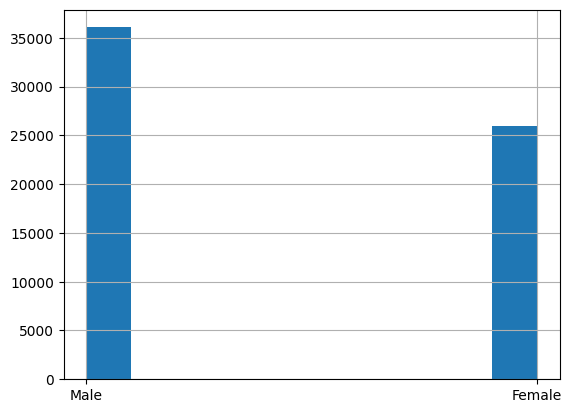

In [ ]:
# Distibution of gender value
df['gender'].hist()

In [ ]:
for col in df.iloc[:, 1:6].columns:
  print(col)
  print(df[col].unique())

Target
[0 1]
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
gender
['Male' nan 'Female']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


## Data Preparation

### Data Cleaning

Dropping the ID column

In [ ]:
#Creating a copy of our dataset
df_cleaned = df.copy()

#Dropping the ID column
df_cleaned.drop('ID',axis=1, inplace=True)

Dropping Duplicates

In [ ]:
#Check for duplicated
dup = df_cleaned.duplicated()

#Check if there is any duplicate row with the True value for Target
print(df_cleaned[dup]['Target'].unique())

#Drop all the duplicate rows
df_cleaned.drop_duplicates(inplace=True)

[0]


Making sure that each model has just 1 segment

In [ ]:
# Grouping the columns 
groups = df_cleaned.groupby(['car_model', 'car_segment']).size()

# Sorting them in asc order
groups = groups.sort_index(level='car_model')

# Printing the unique combinations and their counts
for groups, count in groups.iteritems():
    print(f"{groups}: {count}")

('model_1', 'LCV'): 14975
('model_10', 'Large/SUV'): 3168
('model_11', 'Small/Medium'): 612
('model_12', 'Small/Medium'): 613
('model_13', 'Large/SUV'): 710
('model_14', 'Small/Medium'): 78
('model_15', 'Small/Medium'): 334
('model_16', 'LCV'): 114
('model_17', 'Other'): 56
('model_17', 'Small/Medium'): 97
('model_18', 'Small/Medium'): 101
('model_19', 'Other'): 2
('model_2', 'Small/Medium'): 33645
('model_3', 'Large/SUV'): 16571
('model_4', 'Small/Medium'): 14948
('model_5', 'Large/SUV'): 24172
('model_6', 'Small/Medium'): 3057
('model_7', 'LCV'): 8037
('model_8', 'Large/SUV'): 6329
('model_9', 'LCV'): 992


<ipython-input-55-82b622a30328>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for groups, count in groups.iteritems():


We can see that model_17 has 2 types, which should both be Small/Medium

In [ ]:
# locating the rows where car_model = nodel_17
mask = (df_cleaned['car_model'] == 'model_17') & (df_cleaned['car_segment'] == 'Other')

# Changing the values of car_segment for model_17 to 'small/medium'
df_cleaned.loc[mask, 'car_segment'] = 'Small/Medium'

In [ ]:
#Checking that there are no more model_17 with the car segment Other
print(((df_cleaned['car_model'] == 'model_17') & (df_cleaned['car_segment'] == 'Other')).unique())

[False]


In [ ]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [ ]:
#Extracting the Target Variable
y = df_cleaned.pop('Target')

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
128606    1
128607    1
128608    1
128609    1
128610    1
Name: Target, Length: 128611, dtype: int64

### Handling Missing Values
In the following part we will be using KNNImputer to predict the missing values

Step 1 is to transform all categorical data to numerical

In [ ]:
#Converting the column age_band 
age_mapper = {
    "1. <25": 1, 
    "2. 25 to 34": 2, 
    "3. 35 to 44": 3,
    "4. 45 to 54": 4,
    "5. 55 to 64": 5,
    "6. 65 to 74": 6,
    "7. 75+":7
}
age_mapper

{'1. <25': 1,
 '2. 25 to 34': 2,
 '3. 35 to 44': 3,
 '4. 45 to 54': 4,
 '5. 55 to 64': 5,
 '6. 65 to 74': 6,
 '7. 75+': 7}

In [ ]:
df_cleaned["age_band"] = df_cleaned["age_band"].replace(age_mapper)
df_cleaned["age_band"]

0         3.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
128606    NaN
128607    NaN
128608    NaN
128609    NaN
128610    NaN
Name: age_band, Length: 128611, dtype: float64

In [ ]:
#Converting the column gender
gender_mapper = {
   "Male":0,
   "Female":1
}
df_cleaned["gender"] = df_cleaned["gender"].replace(gender_mapper)

In [ ]:
# Extracting Different Types of Columns
cat_cols = ['car_model', 'car_segment']
num_cols =['gender','age_band','age_of_vehicle_years','sched_serv_warr','non_sched_serv_warr','sched_serv_paid','non_sched_serv_paid','total_paid_services','total_services',	'mth_since_last_serv',	'annualised_mileage',	'num_dealers_visited',	'num_serv_dealer_purchased']

In [ ]:
#Extracting the categorical columns and performing one-hot encoding on them 
df_cat = pd.get_dummies(df_cleaned[cat_cols])
X= df_cleaned[num_cols]
X = pd.concat([X, df_cat], axis=1)

In [ ]:
#df_cleaned.columns
X

,gender,age_band,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0.0,3.0,9,2,10,3,7,5,6,9,...,0,0,0,0,0,0,1,0,0,0
1,NaN,NaN,6,10,3,10,4,9,10,6,...,0,0,0,0,0,0,0,0,0,1
2,0.0,NaN,9,10,9,10,9,10,10,7,...,0,0,0,0,0,0,0,1,0,0
3,NaN,NaN,5,8,5,8,4,5,6,4,...,0,0,0,0,0,0,0,1,0,0
4,1.0,NaN,8,9,4,10,7,9,8,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128606,NaN,NaN,7,10,10,9,10,10,10,3,...,0,0,0,0,0,0,0,1,0,0
128607,NaN,NaN,4,10,10,10,10,10,10,2,...,0,0,0,0,0,0,0,1,0,0
128608,NaN,NaN,4,4,9,5,4,3,8,4,...,0,1,0,0,0,0,0,1,0,0
128609,NaN,NaN,2,1,10,1,10,9,8,3,...,0,1,0,0,0,0,0,1,0,0


We have to split before Imputing

In [ ]:
#Splitting the dataset into "data" and "test"
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#Splitting the "data" dataset into "train" and "dev"
X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, test_size=0.2, random_state=42,stratify=y_data)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Initiate a KNNImputer
imputer = KNNImputer(n_neighbors=5)

#Checking the values that are missing
for col in X_train.columns[X_train.isna().any()]:
    if X_train[col].dtype == 'object': 

        # training a random forest classifier on the non-missing values
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train[X_train[col].notna()], y_train[X_train[col].notna()])
        
        # predicting the missing values using the trained classifier on the dev train and test dataset
        X_dev[col] = clf.predict(X_dev[X_dev[col].isna()][X_train.columns])
        X_train[col] = clf.predict(X_train[X_train[col].isna()][X_train.columns])
        X_test[col] = clf.predict(X_test[X_test[col].isna()][X_train.columns])

# impute the remaining missing values using KNN imputation
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(imputer.transform(X_dev), columns=X_dev.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)



In [ ]:
#Round the values that we got

X_train[['gender','age_band']] = X_train[['gender','age_band']].round()
X_dev[['gender','age_band']] = X_dev[['gender','age_band']].round()
X_test[['gender','age_band']] = X_test[['gender','age_band']].round()

In [ ]:
#Save those datasets for the coming experiments so that we do not have to go through preprocessing again

from google.colab import files
#Save train datasets
X_train.to_csv('train_data.csv', index=False)
files.download('train_data.csv')

y_train.to_csv('y_train.csv', index=False)
files.download('y_train.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save dev datasets
X_dev.to_csv('dev_data.csv', index=False)
files.download('dev_data.csv')

y_dev.to_csv('y_dev.csv', index=False)
files.download('y_dev.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save test datasets
X_test.to_csv('test_data.csv', index=False)
files.download('test_data.csv')

y_test.to_csv('y_test.csv', index=False)
files.download('y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#check to make sure everything is good 
X_train.head()

,gender,age_band,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,1.0,3.0,7.0,6.0,8.0,6.0,6.0,5.0,6.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,5.0,3.0,6.0,5.0,8.0,8.0,8.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,5.0,7.0,7.0,7.0,8.0,5.0,6.0,6.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,3.0,2.0,6.0,4.0,7.0,4.0,4.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,2.0,2.0,5.0,2.0,7.0,6.0,3.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#import the saved datasets again to check that they have downloaded and imported correctly 
X_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/train_data.csv')
X_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/dev_data.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/test_data.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_train.csv')
y_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_dev.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_test.csv')

In [ ]:
#Checking the sizes of the datasets
print("The size of X_train is:",X_train.shape)
print("The size of X_dev is:",X_dev.shape)
print("The size of X_test is:",X_test.shape)
print("The size of y_train is:",y_train.shape)
print("The size of y_dev is:", y_dev.shape)
print("The size of y_test is:",y_test.shape)

The size of X_train is: (82310, 36)
The size of X_dev is: (20578, 36)
The size of X_test is: (25723, 36)
The size of y_train is: (82310, 1)
The size of y_dev is: (20578, 1)
The size of y_test is: (25723, 1)


In [ ]:
#checking the distribution of the target variable on trian dev and test
y_train.value_counts()

Target
0         80056
1          2254
dtype: int64

In [ ]:
y_dev.value_counts()

Target
0         20015
1           563
dtype: int64

In [ ]:
y_test.value_counts()

Target
0         25019
1           704
dtype: int64

## Visualizations

In this part, I am going to do a visual represntation of my data after cleaning

In [8]:
#first I want to concat the X datasets with the ys for each of the train dev and test
train_df = pd.concat([y_train, X_train], axis=1)
dev_df = pd.concat([y_dev, X_dev], axis=1)
test_df = pd.concat([y_test, X_test], axis=1)

#Now I will combine them all together
final_df = pd.concat([train_df, dev_df, test_df])

In [ ]:
#restarting the numbering of the rows
final_df = final_df.reset_index(drop=True)
final_df

Plotting gender

<Axes: >

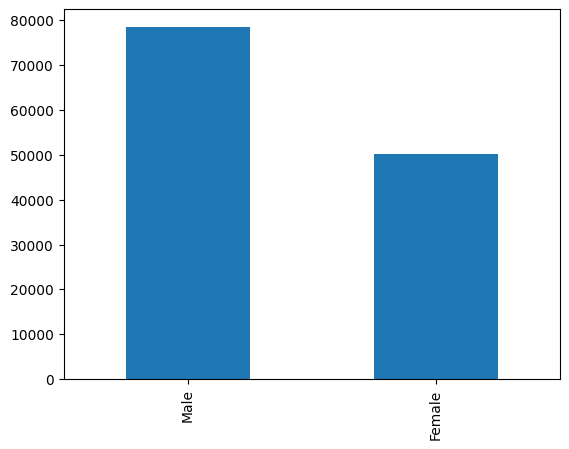

In [25]:
#Checking the gender distributions after missing values
gender_mapper = {
   0:"Male",
   1:"Female"
}
counts = final_df['gender'].value_counts()
counts.plot(kind='bar')

In [ ]:
# Distribution of Gender for the true value
targ = final_df[final_df['Target'] == 1]
counts = targ['gender'].value_counts()
counts.plot(kind='bar')

Plotting age_band

<Axes: >

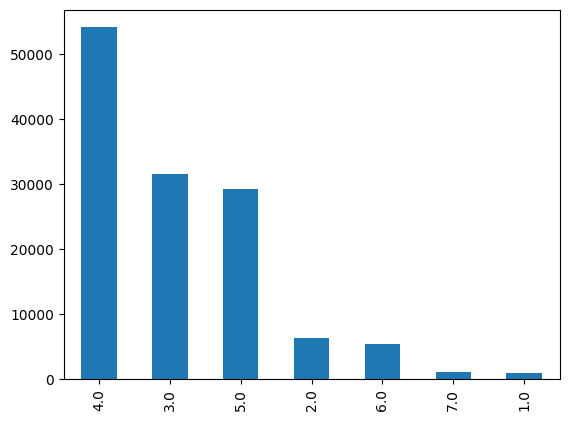

In [39]:
#Plotting age_band
band = final_df['age_band'].value_counts()
band.plot(kind='bar')

<Axes: >

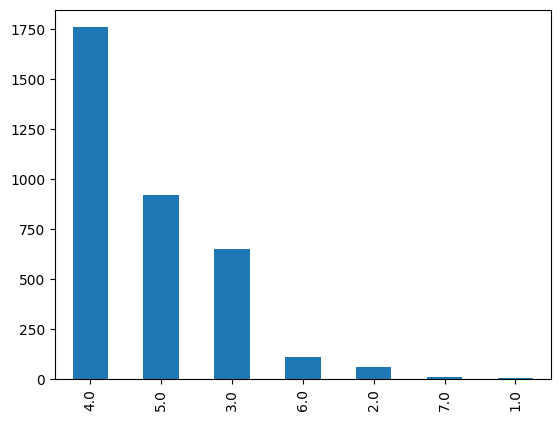

In [42]:
# Distribution of age_band for the true value

targ_age = final_df[final_df['Target'] == 1]
band = targ_age['age_band'].value_counts()
band.plot(kind='bar')

Plotting car_segment

<Axes: >

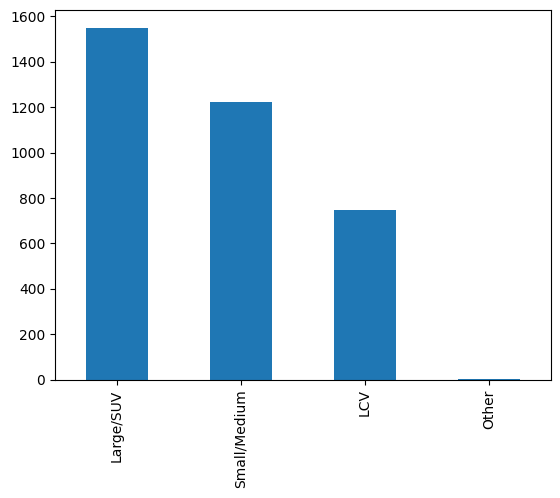

In [50]:
#Plotting car_segment when Target =1
targ_age = df[df['Target'] == 1]
segment = targ_age['car_segment'].value_counts()
segment.plot(kind='bar')

plotting car_model

<Axes: >

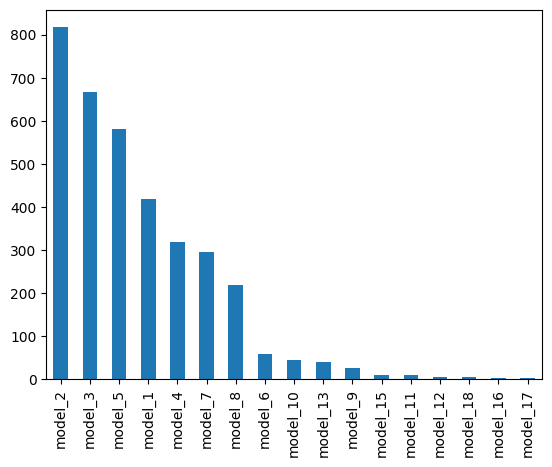

In [51]:
#Plotting car_model when Target =1
targ_age = df[df['Target'] == 1]
model = targ_age['car_model'].value_counts()
model.plot(kind='bar')

## Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

#tl = TomekLinks()
#X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

# perform oversampling using SMOTE
smote = SMOTE(sampling_strategy=0.7)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_train = X_resampled
y_train = y_resampled

## Modeling

## Assessing baseline model

In [ ]:
# Creating a database filled with 1
y_base = np.full(y_train.shape, 1)

# Calculating the precision score
print("The Precision Score of this model is:",precision_score(y_train, y_base))

# Calculating the accuracy score
print("The Accuracy Score of this model is:",accuracy_score(y_train, y_base))


The Precision Score of this model is: 0.41176384143429223
The Accuracy Score of this model is: 0.41176384143429223


### Train Logistic Regression Classifier

In [ ]:
#Initiating a LogisticRegression class
log_reg = LogisticRegression(max_iter =800,random_state = 42, C=0.5)

#Fitting the data in it
log_reg.fit(X_train, y_train)

#Making Predictions
y_train_preds = log_reg.predict(X_train)

#Checking the recall score
print("The recall Score of this model is:",recall_score(y_train, y_train_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_train, y_train_preds))

#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_preds)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The recall Score of this model is: 0.8301183104623566
The f1 Score of this model is: 0.8034230842299788


array([[66812, 13244],
       [ 9520, 46519]])

Predicting Dev data

In [ ]:
#Making Predictions
y_dev_preds = log_reg.predict(X_dev)

#Checking the recall score
print("The recall Score of this model is:",recall_score(y_dev, y_dev_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_dev, y_dev_preds))

#Checking the Confusion Matrix
confusion_matrix(y_dev, y_dev_preds)

The recall Score of this model is: 0.8241563055062167
The f1 Score of this model is: 0.21090909090909088


array([[16642,  3373],
       [   99,   464]])

Test Dataset

In [ ]:
#Making Predictions
y_test_preds = log_reg.predict(X_test)

#Checking the recall score
print("The Recall Score of this model is:", recall_score(y_test, y_test_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_test, y_test_preds))

#Checking the Confusion Matrix
confusion_matrix(y_test, y_test_preds)

The Recall Score of this model is: 0.8068181818181818
The f1 Score of this model is: 0.20752648885641212


array([[20817,  4202],
       [  136,   568]])